## Two-way ANOVA
https://support.minitab.com/en-us/minitab-express/1/help-and-how-to/modeling-statistics/anova/how-to/two-way-anova/interpret-the-results/key-results/#step-1-determine-whether-the-main-effects-and-interaction-effect-are-statistically-significant

In [1]:
! python --version

Python 3.7.7


In [2]:
import pandas as pd
import numpy as numpy

import matplotlib.pyplot as plt

from scipy import stats
import researchpy as rp
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [3]:
bike_sharing_data = pd.read_csv('../data/bike_sharing_data_processed.csv')

bike_sharing_data.head()

,season,mnth,holiday,workingday,weathersit,temp,cnt
0,1,1,0,0,2,0.344167,985
1,1,1,0,0,2,0.363478,801
2,1,1,0,1,1,0.196364,1349
3,1,1,0,1,1,0.200000,1562
4,1,1,0,1,1,0.226957,1600


In [4]:
bike_sharing_data['weathersit'].unique()

array([2, 1, 3])

In [5]:
bike_sharing_data['season'].unique()

array([1, 2, 3, 4])

### Mean of `windspeed` group by `weathersit`

In [6]:
rp.summary_cont(bike_sharing_data.groupby(['weathersit']))['cnt']

,N,Mean,SD,SE,95% Conf.,Interval
weathersit,,,,,,
1,463,4876.786177,1879.483989,87.347028,4705.586001,5047.986353
2,247,4035.862348,1809.109918,115.110908,3810.244969,4261.479727
3,21,1803.285714,1240.284449,270.652256,1272.807293,2333.764136


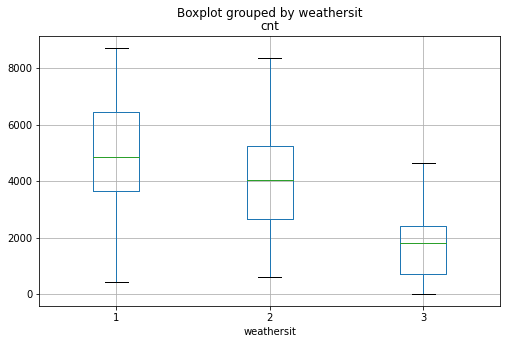

In [7]:
bike_sharing_data.boxplot(column=['cnt'], by='weathersit', figsize=(8, 5));

In [8]:
rp.summary_cont(bike_sharing_data.groupby(['season']))['cnt']

,N,Mean,SD,SE,95% Conf.,Interval
season,,,,,,
1,181,2604.132597,1399.942119,104.056878,2400.181115,2808.084078
2,184,4992.331522,1695.977235,125.029101,4747.274485,5237.388559
3,188,5644.303191,1459.800381,106.466885,5435.628097,5852.978286
4,178,4728.162921,1699.615261,127.391550,4478.475484,4977.850359


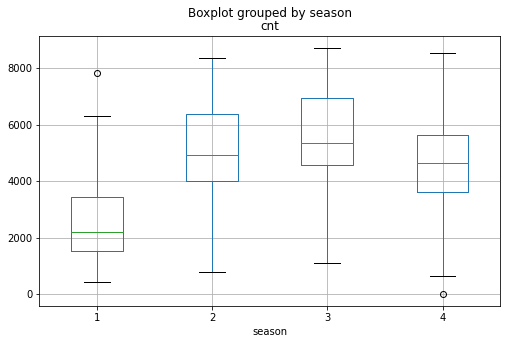

In [9]:
bike_sharing_data.boxplot(column=['cnt'], by='season', figsize=(8, 5));

### Find F-statistics by ols model
https://www.statsmodels.org/stable/examples/notebooks/generated/interactions_anova.html#Two-way-ANOVA

In [10]:
model = ols('cnt ~ C(weathersit)', bike_sharing_data).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.097
Method:                 Least Squares   F-statistic:                     40.07
Date:                Fri, 24 Apr 2020   Prob (F-statistic):           3.11e-17
Time:                        08:19:50   Log-Likelihood:                -6531.5
No. Observations:                 731   AIC:                         1.307e+04
Df Residuals:                     728   BIC:                         1.308e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           4876.7862     85

In [11]:
model = ols('cnt ~ C(season)', bike_sharing_data).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.344
Method:                 Least Squares   F-statistic:                     128.8
Date:                Fri, 24 Apr 2020   Prob (F-statistic):           6.72e-67
Time:                        08:19:50   Log-Likelihood:                -6413.9
No. Observations:                 731   AIC:                         1.284e+04
Df Residuals:                     727   BIC:                         1.285e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       2604.1326    116.598     22.

In [12]:
# '+' - we're not taking into account interactions between these two categorical variables
model = ols('cnt ~ C(weathersit) + C(season)', bike_sharing_data).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.436
Model:                            OLS   Adj. R-squared:                  0.432
Method:                 Least Squares   F-statistic:                     112.0
Date:                Fri, 24 Apr 2020   Prob (F-statistic):           1.13e-87
Time:                        08:19:50   Log-Likelihood:                -6360.4
No. Observations:                 731   AIC:                         1.273e+04
Df Residuals:                     725   BIC:                         1.276e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           2931.9780    116

In [13]:
sm.stats.anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(weathersit),2.0,2.716446e+08,1.358223e+08,63.717757,3.218999e-26
C(season),3.0,9.224636e+08,3.074879e+08,144.250530,2.702818e-73
Residual,725.0,1.545427e+09,2.131624e+06,NaN,NaN


In [14]:
# '*' - we want to also consider interaction between these two categorical variables
model = ols('cnt ~ C(weathersit) * C(season)', bike_sharing_data).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.447
Model:                            OLS   Adj. R-squared:                  0.439
Method:                 Least Squares   F-statistic:                     52.85
Date:                Fri, 24 Apr 2020   Prob (F-statistic):           5.25e-85
Time:                        08:19:50   Log-Likelihood:                -6353.1
No. Observations:                 731   AIC:                         1.273e+04
Df Residuals:                     719   BIC:                         1.279e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

In [15]:
sm.stats.anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(weathersit),2.0,2.716446e+08,1.358223e+08,64.469065,1.766520e-26
C(season),3.0,9.224636e+08,3.074879e+08,145.951415,7.347364e-74
C(weathersit):C(season),6.0,3.065076e+07,5.108460e+06,2.424769,2.505746e-02
Residual,719.0,1.514776e+09,2.106782e+06,NaN,NaN
